# Credit card approval prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d1=pd.read_csv("D:\\Data analytics\\project data sets\\Credit_card.csv")
d2=pd.read_csv("D:\\Data analytics\\project data sets\\Credit_card_label.csv")

In [3]:
data=d1.merge(d2,how="inner",on=["Ind_ID"])

In [4]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
data.rename(columns={'Birthday_count':'Age'},inplace=True)

In [6]:
data.shape

(1548, 19)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

# Data cleaning

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Age', 'Employed_days', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members', 'label'],
      dtype='object')

In [10]:
data.drop(['GENDER', 'Car_Owner', 'Propert_Owner','Housing_type','Mobile_phone','Phone','Type_Occupation','Employed_days'],inplace=True,axis=1)

In [11]:
data.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Age', 'Work_Phone', 'EMAIL_ID', 'Family_Members',
       'label'],
      dtype='object')

In [12]:
data.isna().sum()

Ind_ID             0
CHILDREN           0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Age               22
Work_Phone         0
EMAIL_ID           0
Family_Members     0
label              0
dtype: int64

In [13]:
data.isna().sum()/1548*100

Ind_ID            0.000000
CHILDREN          0.000000
Annual_income     1.485788
Type_Income       0.000000
EDUCATION         0.000000
Marital_status    0.000000
Age               1.421189
Work_Phone        0.000000
EMAIL_ID          0.000000
Family_Members    0.000000
label             0.000000
dtype: float64

In [14]:
data.describe()

,Ind_ID,CHILDREN,Annual_income,Age,Work_Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,0.208010,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,0.406015,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,0.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,1.000000,1.000000,15.000000,1.000000


In [15]:
data['Age'].fillna(-16040, inplace=True)
data['Annual_income'].fillna(1.913993e+05, inplace=True)

In [16]:
data.isna().sum()

Ind_ID            0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Age               0
Work_Phone        0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [17]:
data.head()

,Ind_ID,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Age,Work_Phone,EMAIL_ID,Family_Members,label
0,5008827,0,180000.0,Pensioner,Higher education,Married,-18772.0,0,0,2,1
1,5009744,0,315000.0,Commercial associate,Higher education,Married,-13557.0,1,0,2,1
2,5009746,0,315000.0,Commercial associate,Higher education,Married,-16040.0,1,0,2,1
3,5009749,0,191399.3,Commercial associate,Higher education,Married,-13557.0,1,0,2,1
4,5009752,0,315000.0,Commercial associate,Higher education,Married,-13557.0,1,0,2,1


In [18]:
from datetime import datetime, timedelta

def days_to_date(days):
    # Defining a base date as a starting point (you can change this to your desired date)
    base_date = datetime(2023, 11, 7)
    
    # Calculate the target date by adding the given number of days to the base date
    target_date = base_date + timedelta(days=days)
    
    return target_date.strftime('%d-%m-%Y')

# Example usage:
days = -18772.0
proper_format = days_to_date(days)
print(proper_format)

15-06-1972


In [19]:
data['Age']=data['Age'].apply(days_to_date)

In [20]:
data.head()

,Ind_ID,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Age,Work_Phone,EMAIL_ID,Family_Members,label
0,5008827,0,180000.0,Pensioner,Higher education,Married,15-06-1972,0,0,2,1
1,5009744,0,315000.0,Commercial associate,Higher education,Married,25-09-1986,1,0,2,1
2,5009746,0,315000.0,Commercial associate,Higher education,Married,08-12-1979,1,0,2,1
3,5009749,0,191399.3,Commercial associate,Higher education,Married,25-09-1986,1,0,2,1
4,5009752,0,315000.0,Commercial associate,Higher education,Married,25-09-1986,1,0,2,1


In [21]:
from datetime import datetime

def calculate_age(birthdate):
    # Convert the input string to a datetime object
    birthdate = datetime.strptime(birthdate, '%d-%m-%Y')
    
    # Get the current date
    current_date = datetime.now()
    
    # Calculate the difference in years
    age = current_date.year - birthdate.year
       
    return age
age = calculate_age("15-06-1972")
print("Age:", age)

Age: 51


In [22]:
data['Age']=data['Age'].apply(calculate_age)

In [23]:
data.head()

,Ind_ID,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Age,Work_Phone,EMAIL_ID,Family_Members,label
0,5008827,0,180000.0,Pensioner,Higher education,Married,51,0,0,2,1
1,5009744,0,315000.0,Commercial associate,Higher education,Married,37,1,0,2,1
2,5009746,0,315000.0,Commercial associate,Higher education,Married,44,1,0,2,1
3,5009749,0,191399.3,Commercial associate,Higher education,Married,37,1,0,2,1
4,5009752,0,315000.0,Commercial associate,Higher education,Married,37,1,0,2,1


In [24]:
#data.rename(column=('label':'Target'))

# Data visualisation

In [25]:
data.corr()

C:\Users\Sachin Pawar\AppData\Local\Temp\ipykernel_12784\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Ind_ID,CHILDREN,Annual_income,Age,Work_Phone,EMAIL_ID,Family_Members,label
Ind_ID,1.000000,0.032535,0.029888,-0.022224,0.085794,-0.037923,0.016950,0.016796
CHILDREN,0.032535,1.000000,0.078111,-0.278012,0.035014,0.025776,0.890248,-0.021646
Annual_income,0.029888,0.078111,1.000000,-0.111208,-0.070541,0.121842,0.050677,0.026875
Age,-0.022224,-0.278012,-0.111208,1.000000,-0.172299,-0.166657,-0.264610,0.045089
Work_Phone,0.085794,0.035014,-0.070541,-0.172299,1.000000,-0.009594,0.072228,-0.007046
EMAIL_ID,-0.037923,0.025776,0.121842,-0.166657,-0.009594,1.000000,0.035098,0.012921
Family_Members,0.016950,0.890248,0.050677,-0.264610,0.072228,0.035098,1.000000,-0.030709
label,0.016796,-0.021646,0.026875,0.045089,-0.007046,0.012921,-0.030709,1.000000


C:\Users\Sachin Pawar\AppData\Local\Temp\ipykernel_12784\3733379599.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')


<Axes: >

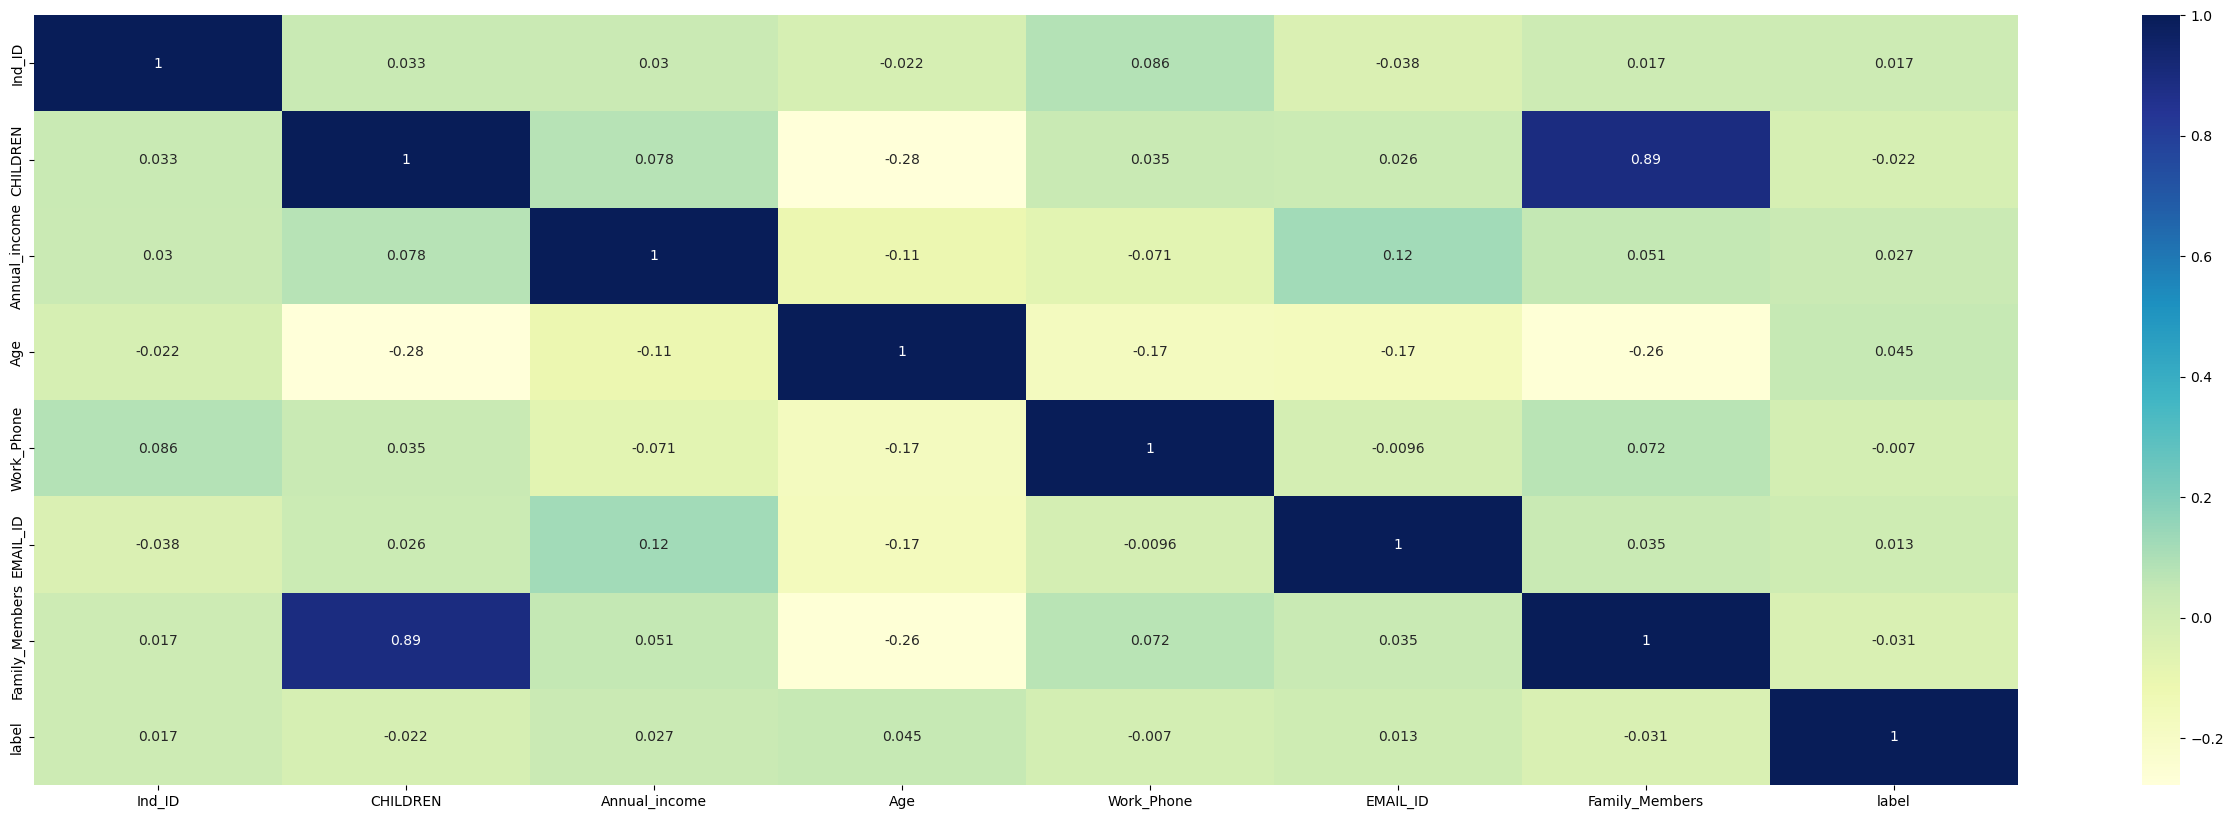

In [26]:
plt.figure(figsize=(32,10))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

C:\Users\Sachin Pawar\AppData\Local\Temp\ipykernel_12784\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

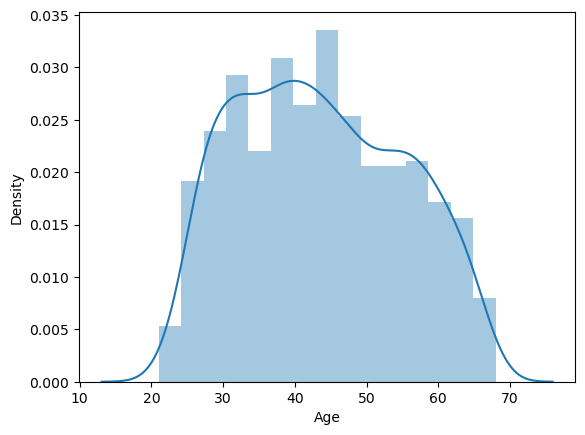

In [27]:
sns.distplot(data['Age'])

<Axes: xlabel='Age', ylabel='Annual_income'>

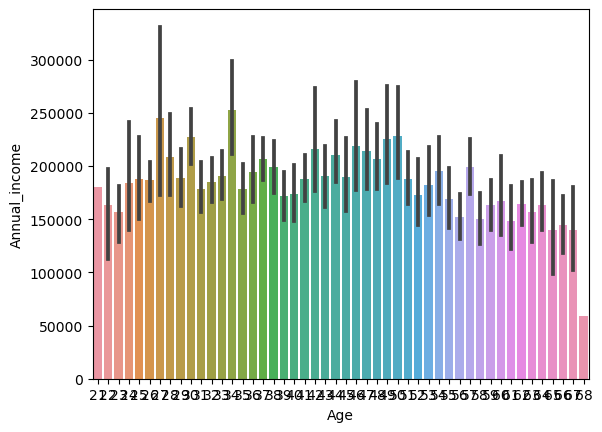

In [28]:
sns.barplot(x=data['Age'],y=data['Annual_income'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   int64  
 1   CHILDREN        1548 non-null   int64  
 2   Annual_income   1548 non-null   float64
 3   Type_Income     1548 non-null   object 
 4   EDUCATION       1548 non-null   object 
 5   Marital_status  1548 non-null   object 
 6   Age             1548 non-null   int64  
 7   Work_Phone      1548 non-null   int64  
 8   EMAIL_ID        1548 non-null   int64  
 9   Family_Members  1548 non-null   int64  
 10  label           1548 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 145.1+ KB


In [30]:
#converting categorical values to numerical vales
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [31]:
le=LabelEncoder()

In [32]:
data["Type_Income"]=le.fit_transform(data["Type_Income"])
data["EDUCATION"]=le.fit_transform(data["EDUCATION"])
data["Marital_status"]=le.fit_transform(data["Marital_status"])

In [33]:
data.head()

,Ind_ID,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Age,Work_Phone,EMAIL_ID,Family_Members,label
0,5008827,0,180000.0,1,1,1,51,0,0,2,1
1,5009744,0,315000.0,0,1,1,37,1,0,2,1
2,5009746,0,315000.0,0,1,1,44,1,0,2,1
3,5009749,0,191399.3,0,1,1,37,1,0,2,1
4,5009752,0,315000.0,0,1,1,37,1,0,2,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   int64  
 1   CHILDREN        1548 non-null   int64  
 2   Annual_income   1548 non-null   float64
 3   Type_Income     1548 non-null   int32  
 4   EDUCATION       1548 non-null   int32  
 5   Marital_status  1548 non-null   int32  
 6   Age             1548 non-null   int64  
 7   Work_Phone      1548 non-null   int64  
 8   EMAIL_ID        1548 non-null   int64  
 9   Family_Members  1548 non-null   int64  
 10  label           1548 non-null   int64  
dtypes: float64(1), int32(3), int64(7)
memory usage: 127.0 KB


In [35]:
X = data.drop(columns='label')
y = data['label']

In [36]:
feature_scale = [feature for feature in data.columns if feature!='label']
## Importing library 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [37]:
scaler.transform(X)

array([[0.        , 0.        , 0.09489051, ..., 0.        , 0.        ,
        0.07142857],
       [0.00647667, 0.        , 0.18248175, ..., 1.        , 0.        ,
        0.07142857],
       [0.0064908 , 0.        , 0.18248175, ..., 1.        , 0.        ,
        0.07142857],
       ...,
       [0.75689515, 0.14285714, 0.09489051, ..., 0.        , 0.        ,
        0.21428571],
       [0.77262422, 0.        , 0.15328467, ..., 1.        , 0.        ,
        0.07142857],
       [0.31756895, 0.        , 0.12408759, ..., 0.        , 0.        ,
        0.07142857]])

In [ ]:
data = pd.concat([data['label'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X), columns=feature_scale)],
                    axis=1)

In [39]:
data.head()

,label,Ind_ID,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Age,Work_Phone,EMAIL_ID,Family_Members
0,1,0.000000,0.0,0.094891,0.333333,0.25,0.25,0.638298,0.0,0.0,0.071429
1,1,0.006477,0.0,0.182482,0.000000,0.25,0.25,0.340426,1.0,0.0,0.071429
2,1,0.006491,0.0,0.182482,0.000000,0.25,0.25,0.489362,1.0,0.0,0.071429
3,1,0.006512,0.0,0.102287,0.000000,0.25,0.25,0.340426,1.0,0.0,0.071429
4,1,0.006533,0.0,0.182482,0.000000,0.25,0.25,0.340426,1.0,0.0,0.071429


In [40]:
data.label.value_counts()

0    1373
1     175
Name: label, dtype: int64

# Balancing the data

In [41]:
from imblearn.combine import SMOTETomek

In [42]:
smk=SMOTETomek(random_state=12)

In [43]:
data.shape

(1548, 11)

In [44]:
X_res,y_res=smk.fit_resample(X,y)

In [45]:
X_res.shape

(2498, 10)

In [46]:
y_res.shape

(2498,)

In [47]:
from collections import Counter

In [48]:
print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

original dataset shape Counter({0: 1373, 1: 175})
Resampled dataset shape Counter({1: 1249, 0: 1249})


# splitting the data

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [51]:
X_train.shape,y_train.shape

((1998, 10), (1998,))

# feature selection

In [70]:
#feature selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#store target column in x variable
X=data.drop("label",axis=1)
y=data.label
chi_select=SelectKBest(chi2,k=8)
chi_select.fit(X,y)
feat=chi_select.get_support()
X.loc[:,feat].columns.tolist()

['Ind_ID',
 'CHILDREN',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Age',
 'EMAIL_ID',
 'Family_Members']

# Model Implementation

# Random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,auc

In [57]:
# Model Building
rf = RandomForestClassifier(random_state=30)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [58]:
# Model Evaluation
pred = rf.predict(X_test)

In [59]:
print(confusion_matrix(y_test, pred))

[[228  19]
 [ 11 242]]


In [60]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       247
           1       0.93      0.96      0.94       253

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [61]:
print(accuracy_score(y_test, pred))

0.94


# Decision tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt=DecisionTreeClassifier(random_state=30)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [64]:
pred2 = dt.predict(X_test)

In [65]:
print(confusion_matrix(y_test, pred2))

[[216  31]
 [ 21 232]]


In [66]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       247
           1       0.88      0.92      0.90       253

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



In [67]:
print(accuracy_score(y_test, pred2))

0.896


# KNeighbors 

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
KNC=KNeighborsClassifier(n_neighbors=3)
KNC.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
pred4= KNC.predict(X_test)

In [68]:
print(confusion_matrix(y_test, pred4))
print(classification_report(y_test, pred4))
print(accuracy_score(y_test, pred4))

[[209  38]
 [ 33 220]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       247
           1       0.85      0.87      0.86       253

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500

0.858
